In [4]:
# 杂交水稻算法实现
# 文章：A Hybrid Rice Optimization Algorithm
# https://doi.org/10.1109/ICCSE.2016.7581575
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def bentCigar(xValues: np.ndarray):
    return xValues[0]**2 + 10**6 * np.sum(xValues**2)

objectFunc = bentCigar
objectFunc

<function __main__.bentCigar(xValues: numpy.ndarray)>

Text(0.5, 0.92, 'Bent Cigar')

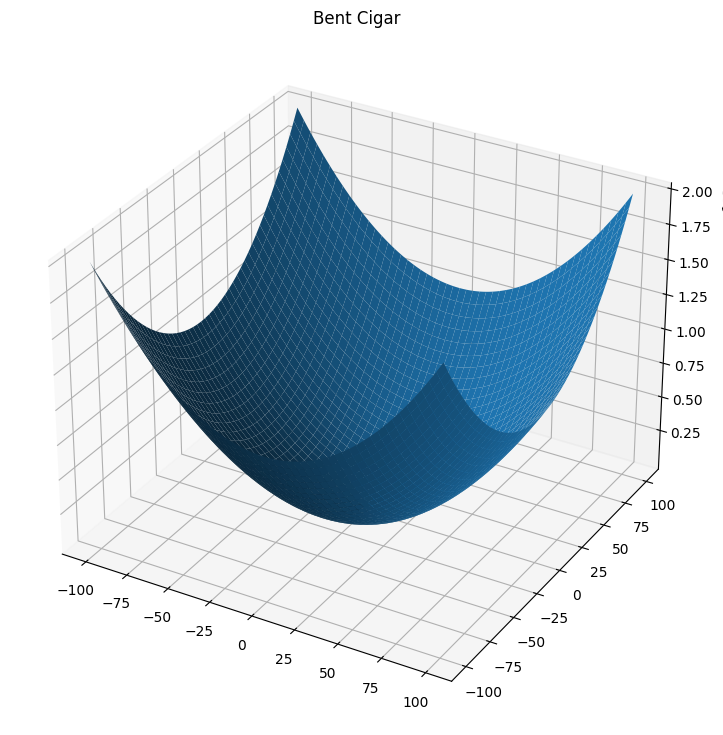

In [140]:
# 三维空间作图，向量各分量在区间 [-5.12, 5.12]
plt.figure(figsize=(9, 9))
ax = plt.subplot(projection='3d')
x1Values = np.linspace(-100, 100, 1000)
x2Values = np.linspace(-100, 100, 1000)
x1Values, x2Values = np.meshgrid(x1Values, x2Values)
yValues = np.array([
    [
        objectFunc(np.array([x1Values[i][j], x2Values[i][j]])) for j in range(x1Values.shape[1])
    ] for i in range(x1Values.shape[0])
])

ax.plot_surface(x1Values, x2Values, yValues)
ax.set_title('Bent Cigar')

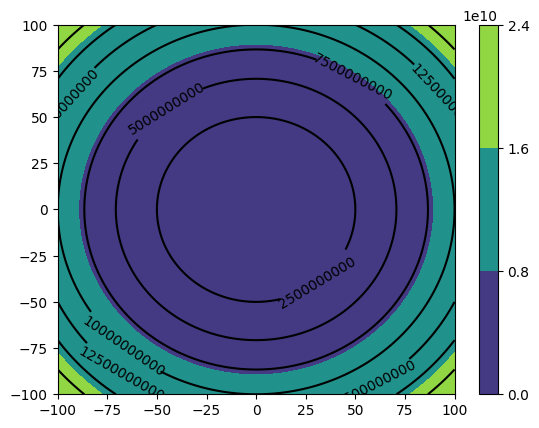

In [141]:
# 二维平面下的等高线图
ctr = plt.contour(x1Values, x2Values, yValues, colors='black')
plt.contourf(x1Values, x2Values, yValues, 2)
plt.clabel(ctr)
plt.colorbar()

In [142]:
maxIteration = 3000  # 最大迭代次数
maxSearchTime = 60  # 最大查找次数

m, n = 60, 2  # m 解向量个数，n 解向量分量数
xLowers = np.array([-100] * n)  # 各分量下限
xUppers = np.array([100] * n)  # 各分量上限

# 初始化种群
population = np.array([xLowers + np.random.rand() * (xUppers - xLowers) for _ in range(m)])
population

array([[-7.02444346e+01, -7.02444346e+01],
       [-3.13279408e+01, -3.13279408e+01],
       [ 7.14678209e+01,  7.14678209e+01],
       [ 2.34526782e+01,  2.34526782e+01],
       [-2.05565689e+01, -2.05565689e+01],
       [-6.16265186e+01, -6.16265186e+01],
       [ 2.62091610e+00,  2.62091610e+00],
       [ 4.26509035e+01,  4.26509035e+01],
       [ 7.06764867e+01,  7.06764867e+01],
       [-1.66622556e+01, -1.66622556e+01],
       [-2.83147878e+01, -2.83147878e+01],
       [ 1.88525991e+01,  1.88525991e+01],
       [-1.59047504e+00, -1.59047504e+00],
       [ 6.67508873e+01,  6.67508873e+01],
       [ 3.35446021e+01,  3.35446021e+01],
       [ 1.49590270e+01,  1.49590270e+01],
       [-1.35399965e+01, -1.35399965e+01],
       [-8.73719532e+01, -8.73719532e+01],
       [ 2.88608767e+01,  2.88608767e+01],
       [-7.66482477e+01, -7.66482477e+01],
       [-2.41657832e+01, -2.41657832e+01],
       [-5.74632372e+01, -5.74632372e+01],
       [ 5.00857144e+01,  5.00857144e+01],
       [ 3.

In [143]:
def getSortedIndexes(population: np.ndarray, objectFunc):
    """计算三系个数，返回按适应值由小到大的下标数组

    @:param population np.array 种群
    @:param objectFunc 目标函数
    """
    groupSize = int(len(population) / 3)
    fitnessValues = np.apply_along_axis(objectFunc, axis=1, arr=population)
    sortedIndexes = fitnessValues.argsort()
    return sortedIndexes[:groupSize], sortedIndexes[groupSize:groupSize*2], sortedIndexes[groupSize*2:]

getSortedIndexes(population, objectFunc)

(array([43, 30, 12,  6, 49, 45, 27, 16, 54, 46, 15, 42,  9, 11,  4,  3, 50,
        20, 38, 33], dtype=int64),
 array([10, 18, 56,  1, 23, 31, 14, 58, 32, 24, 26,  7, 22, 37, 48, 21,  5,
        28, 51, 57], dtype=int64),
 array([13, 41,  0, 34,  8, 40,  2, 29, 19, 35, 53, 55, 44, 17, 52, 59, 25,
        36, 39, 47], dtype=int64))

In [161]:
population = np.array([xLowers + np.random.rand() * (xUppers - xLowers) for _ in range(m)])

searchTimes = np.zeros(m)  # 记录个体查找次数
maxIteration = 3000
iteration = 0

bestFitnessValues = np.zeros(maxIteration)

while iteration < maxIteration:
    maintainerIndexes, restoreIndexes, sterileIndexes = getSortedIndexes(population, objectFunc)

    # hybridization，更新 sterile line
    for i, maintainerIndex in enumerate(maintainerIndexes):
        maintainer = population[maintainerIndex]
        randomSterile = population[np.random.choice(sterileIndexes)]
        newSterile = np.zeros(n)

        for j in range(n):
            r1, r2 = np.random.uniform(0, 1, 2)
            newSterile[j] = (r1 * maintainer[j] + r2 * randomSterile[j]) / (r1 + r2)

        if objectFunc(newSterile) < objectFunc(population[sterileIndexes[-i-1]]):
            population[sterileIndexes[-i-1]] = newSterile
            searchTimes[sterileIndexes[-i-1]] = 0  # 发生替换将对应查询次数置为 0

    # selfing，更新 restore line
    best = population[maintainerIndexes[0]]
    for i, restoreIndex in enumerate(restoreIndexes):
        randomRestore = population[np.random.choice(restoreIndexes)]
        newRestore = np.zeros(n)

        for j in range(n):
            r3 = np.random.rand()
            newRestore[j] = r3 * (best[j] - randomRestore[j]) + population[restoreIndex][j]

        if objectFunc(newRestore) < objectFunc(population[restoreIndex]):
            population[restoreIndex] = newRestore
            searchTimes[restoreIndex] = 0
        else:
            searchTimes[restoreIndex] = searchTimes[restoreIndex] + 1

            # renewal，重置 restore line
            if searchTimes[restoreIndex] >= maxSearchTime:
                population[restoreIndex] = xLowers + np.random.rand() * (xUppers - xLowers)
                searchTimes[restoreIndex] = 0
    # 保存每一代最优
    maintainerIndexes, _, _ = getSortedIndexes(population, objectFunc)
    bestFitnessValues[iteration] = objectFunc(population[maintainerIndexes[0]])
    iteration = iteration + 1
    if (iteration+1) % 300 == 0:
        print(f'第 {iteration+1} 代', objectFunc(population[maintainerIndexes[0]]))


第 300 代 1.2923474167813479e-90
第 600 代 2.488883587156529e-186
第 900 代 1.5338557082279064e-214
第 1200 代 1.533824981432982e-214
第 1500 代 1.5338249795717426e-214
第 1800 代 1.5338249794522847e-214
第 2100 代 1.5338249794518663e-214
第 2400 代 1.533824979451806e-214
第 2700 代 1.5338249794517486e-214
第 3000 代 1.5338249794516903e-214


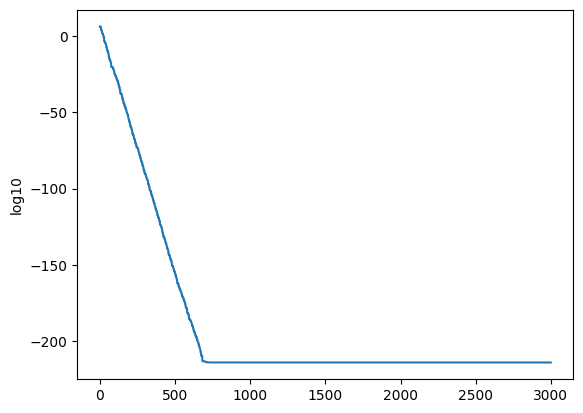

In [164]:
plt.ylabel('log10')
plt.plot(np.arange(0, maxIteration), np.log10(bestFitnessValues))